Sveučilište u Zagrebu  
Fakultet elektrotehnike i računarstva  
  
## Strojno učenje 2020/2021  
http://www.fer.unizg.hr/predmet/su

------------------------------

### Laboratorijska vježba 2: Linearni diskriminativni modeli i logistička regresija

*Verzija: 1.4  
Zadnji put ažurirano: 22. 10. 2020.*

(c) 2015-2020 Jan Šnajder, Domagoj Alagić  

Rok za predaju: **2. studenog 2020. u 06:00h**

------------------------------

### Upute

Prva laboratorijska vježba sastoji se od šest zadataka. U nastavku slijedite upute navedene u ćelijama s tekstom. Rješavanje vježbe svodi se na **dopunjavanje ove bilježnice**: umetanja ćelije ili više njih **ispod** teksta zadatka, pisanja odgovarajućeg kôda te evaluiranja ćelija. 

Osigurajte da u potpunosti **razumijete** kôd koji ste napisali. Kod predaje vježbe, morate biti u stanju na zahtjev asistenta (ili demonstratora) preinačiti i ponovno evaluirati Vaš kôd. Nadalje, morate razumjeti teorijske osnove onoga što radite, u okvirima onoga što smo obradili na predavanju. Ispod nekih zadataka možete naći i pitanja koja služe kao smjernice za bolje razumijevanje gradiva (**nemojte pisati** odgovore na pitanja u bilježnicu). Stoga se nemojte ograničiti samo na to da riješite zadatak, nego slobodno eksperimentirajte. To upravo i jest svrha ovih vježbi.

Vježbe trebate raditi **samostalno** ili u **tandemu**. Možete se konzultirati s drugima o načelnom načinu rješavanja, ali u konačnici morate sami odraditi vježbu. U protivnome vježba nema smisla.

In [1]:
# Učitaj osnovne biblioteke...
import sklearn
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
def plot_2d_clf_problem(X, y, h=None):
    '''
    Plots a two-dimensional labeled dataset (X,y) and, if function h(x) is given, 
    the decision surfaces.
    '''
    assert X.shape[1] == 2, "Dataset is not two-dimensional"
    if h!=None : 
        # Create a mesh to plot in
        r = 0.04  # mesh resolution
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, r),
                             np.arange(y_min, y_max, r))
        XX=np.c_[xx.ravel(), yy.ravel()]
        try:
            Z_test = h(XX)
            if Z_test.shape == ():
                # h returns a scalar when applied to a matrix; map explicitly
                Z = np.array(list(map(h,XX)))
            else :
                Z = Z_test
        except ValueError:
            # can't apply to a matrix; map explicitly
            Z = np.array(list(map(h,XX)))
        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        plt.contourf(xx, yy, Z, cmap=plt.cm.Pastel1)

    # Plot the dataset
    plt.scatter(X[:,0],X[:,1], c=y, cmap=plt.cm.tab20b, marker='o', s=50);

## Zadatci

### 1. Linearna regresija kao klasifikator

U prvoj laboratorijskoj vježbi koristili smo model linearne regresije za, naravno, regresiju. Međutim, model linearne regresije može se koristiti i za **klasifikaciju**. Iako zvuči pomalo kontraintuitivno, zapravo je dosta jednostavno. Naime, cilj je naučiti funkciju $f(\mathbf{x})$ koja za negativne primjere predviđa vrijednost $1$, dok za pozitivne primjere predviđa vrijednost $0$. U tom slučaju, funkcija $f(\mathbf{x})=0.5$ predstavlja granicu između klasa, tj. primjeri za koje vrijedi $h(\mathbf{x})\geq 0.5$ klasificiraju se kao pozitivni, dok se ostali klasificiraju kao negativni.

Klasifikacija pomoću linearne regresije implementirana je u razredu [`RidgeClassifier`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeClassifier.html). U sljedećim podzadatcima **istrenirajte** taj model na danim podatcima i **prikažite** dobivenu granicu između klasa. Pritom isključite regularizaciju ($\alpha = 0$, odnosno `alpha=0`). Također i ispišite **točnost** vašeg klasifikacijskog modela (smijete koristiti funkciju [`metrics.accuracy_score`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)). Skupove podataka vizualizirajte korištenjem pomoćne funkcije ``plot_clf_problem(X, y, h=None)`` koja je dana na početku ove bilježnice. `X` i `y` predstavljaju ulazne primjere i oznake, dok `h` predstavlja funkciju predikcije modela (npr. `model.predict`). 

U ovom zadatku cilj je razmotriti kako se klasifikacijski model linearne regresije ponaša na linearno odvojim i neodvojivim podatcima.

In [3]:
from sklearn.linear_model import LinearRegression, RidgeClassifier
from sklearn.metrics import accuracy_score

### (a)

Prvo, isprobajte *ugrađeni* model na linearno odvojivom skupu podataka `seven` ($N=7$).

In [4]:
seven_X = np.array([[2,1], [2,3], [1,2], [3,2], [5,2], [5,4], [6,3]])
seven_y = np.array([1, 1, 1, 1, 0, 0, 0])

[1 1 1 1 0 0 0]
accuracy with score = 1.0
accuracy with metrics = 1.0


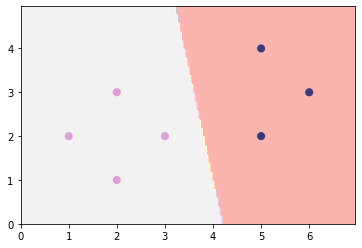

In [5]:
# Vaš kôd ovdje

clf_1a = RidgeClassifier(alpha = 0).fit(seven_X, seven_y) # treniranje modela s RidgeClassifierom
seven_hx_1a = clf_1a.predict(seven_X) # izracun predikcija pomocu metode predict
print(seven_hx_1a) # ispis

accuracy_with_score_1a = clf_1a.score(seven_X, seven_y) # izracun preciznosti s metodom score
accuracy_with_metrics_1a = accuracy_score(seven_hx_1a, seven_y) # izracun preciznosti s metodom accuracy_score

print("accuracy with score = {}".format(accuracy_with_score_1a)) # ispis
print("accuracy with metrics = {}".format(accuracy_with_metrics_1a)) # ispis

plot_2d_clf_problem(seven_X, seven_y, lambda x : clf_1a.predict(x) >= 0.5) # vizualizacija podataka


Kako bi se uvjerili da se u isprobanoj implementaciji ne radi o ničemu doli o običnoj linearnoj regresiji, napišite kôd koji dolazi do jednakog rješenja korištenjem isključivo razreda [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html). Funkciju za predikciju, koju predajete kao treći argument `h` funkciji `plot_2d_clf_problem`, možete definirati lambda-izrazom: `lambda x : model.predict(x) >= 0.5`.

[1 1 1 1 0 0 0]
accuracy with score = 0.8833333333333333
accuracy with metrics = 1.0


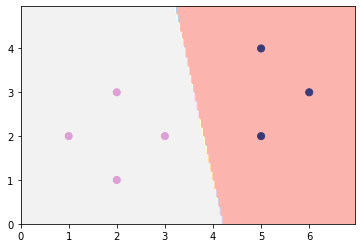

In [6]:
# Vaš kôd ovdje
reg_1a = LinearRegression().fit(seven_X, seven_y) # treniranje modela s LinearRegression
seven_hx_1a_2 = clf_1a.predict(seven_X) # izracun predikcija pomocu metode predict
print(seven_hx_1a_2) # ispis

accuracy_with_score_1a_2 = reg_1a.score(seven_X, seven_y) # izracun preciznosti s metodom score
accuracy_with_metrics_1a_2 = accuracy_score(seven_hx_1a_2, seven_y) # izracun preciznosti s metodom accuracy_score

print("accuracy with score = {}".format(accuracy_with_score_1a_2)) # ispis
print("accuracy with metrics = {}".format(accuracy_with_metrics_1a_2)) # ispis


plot_2d_clf_problem(seven_X, seven_y, lambda x : reg_1a.predict(x) >= 0.5) # vizualizacija podataka

**Q:** Kako bi bila definirana granica između klasa ako bismo koristili oznake klasa $-1$ i $1$ umjesto $0$ i $1$?

### (b)  

Probajte isto na linearno odvojivom skupu podataka `outlier` ($N=8$):

In [7]:
outlier_X = np.append(seven_X, [[12,8]], axis=0)
outlier_y = np.append(seven_y, 0)

[ 0.67600701  0.98423818  1.03152364  0.62872154  0.22591944  0.53415061
  0.17863398 -0.2591944 ]


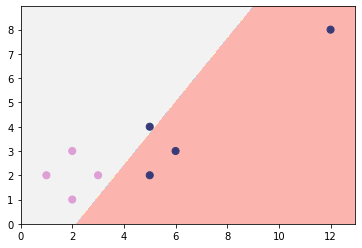

In [13]:
# Vaš kôd ovdje
reg_1b = LinearRegression().fit(outlier_X, outlier_y)  # treniranje modela s LinearRegression
outlier_hx_1b = reg_1b.predict(outlier_X) # izracun predikcija pomocu metode predict
print(outlier_hx_1b) # ispis

plot_2d_clf_problem(outlier_X, outlier_y, lambda x : reg_1b.predict(x) >= 0.5) # vizualizacija podataka


**Q:** Zašto model ne ostvaruje potpunu točnost iako su podatci linearno odvojivi?

### (c)  

Završno, probajte isto na linearno neodvojivom skupu podataka `unsep` ($N=8$):

In [9]:
unsep_X = np.append(seven_X, [[2,2]], axis=0)
unsep_y = np.append(seven_y, 0)

[ 0.80808081  0.72727273  0.96969697  0.56565657  0.16161616  0.08080808
 -0.08080808  0.76767677]


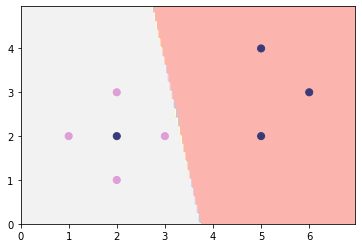

In [14]:
# Vaš kôd ovdje
reg_1c = LinearRegression().fit(unsep_X, unsep_y) # treniranje modela s LinearRegression
unsep_hx_1c = reg_1c.predict(unsep_X) # izracun predikcija pomocu metode predict
print(unsep_hx_1c) # ispis

plot_2d_clf_problem(unsep_X, unsep_y, lambda x : reg_1c.predict(x) >= 0.5) # vizualizacija podataka


**Q:** Očito je zašto model nije u mogućnosti postići potpunu točnost na ovom skupu podataka. Međutim, smatrate li da je problem u modelu ili u podacima? Argumentirajte svoj stav.

### 2. Višeklasna klasifikacija

Postoji više načina kako se binarni klasifikatori mogu se upotrijebiti za višeklasnu klasifikaciju. Najčešće se koristi shema tzv. **jedan-naspram-ostali** (engl. *one-vs-rest*, OVR), u kojoj se trenira po jedan klasifikator $h_j$ za svaku od $K$ klasa. Svaki klasifikator $h_j$ trenira se da razdvaja primjere klase $j$ od primjera svih drugih klasa, a primjer se klasificira u klasu $j$ za koju je $h_j(\mathbf{x})$ maksimalan.

Pomoću funkcije [`datasets.make_classification`](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html) generirajte slučajan dvodimenzijski skup podataka od tri klase i prikažite ga koristeći funkciju `plot_2d_clf_problem`. Radi jednostavnosti, pretpostavite da nema redundantnih značajki te da je svaka od klasa "zbijena" upravo u jednu grupu.

[2 0 2 0 1 1 2 0 2 0 0 0 1 1 0 2 2 1 2 2 2 0 2 1 1 0 1 0 2 0 1 1 2 1 0 2 1
 2 2 2 2 2 2 1 0 0 1 1 2 2 0 2 1 1 0 2 0 0 0 0 2 1 1 0 1 0 2 0 0 1 1 1 2 1
 2 1 0 2 1 2 0 2 0 1 0 0 2 0 0 1 0 2 1 1 1 0 2 0 1 1]


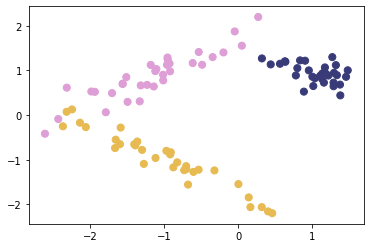

In [15]:
from sklearn.datasets import make_classification

# Vaš kôd ovdje
# generiranje slucajnog dvodimenzijskog skupa podataka od tri klase
X_2a, y_2a = make_classification(n_samples=100, n_features=2, 
                                n_informative=2, n_redundant=0, 
                                 n_repeated=0, n_classes=3, 
                                 n_clusters_per_class=1)
print(y_2a)
plot_2d_clf_problem(X_2a, y_2a) # vizualizacija podataka


Trenirajte tri binarna klasifikatora, $h_1$, $h_2$ i $h_3$ te prikažite granice između klasa (tri grafikona). Zatim definirajte $h(\mathbf{x})=\mathrm{argmax}_j h_j(\mathbf{x})$  (napišite svoju funkciju `predict` koja to radi) i prikažite granice između klasa za taj model. Zatim se uvjerite da biste identičan rezultat dobili izravno primjenom modela `RidgeClassifier`, budući da taj model za višeklasan problem zapravo interno implementira shemu jedan-naspram-ostali.

**Q:** Alternativna shema jest ona zvana **jedan-naspram-jedan** (engl, *one-vs-one*, OVO). Koja je prednost sheme OVR nad shemom OVO? A obratno?

### 3. Logistička regresija

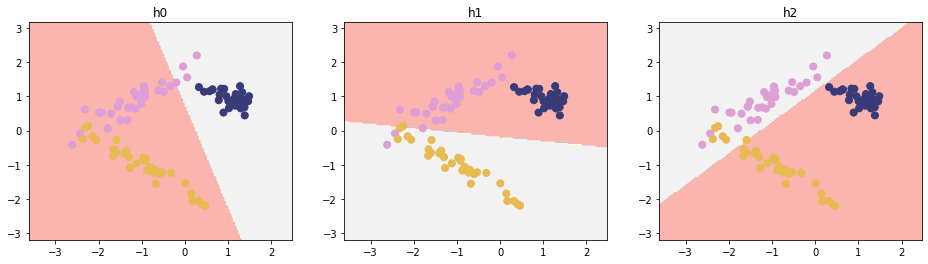

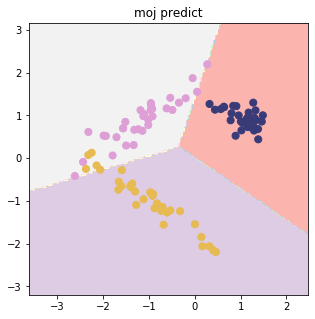

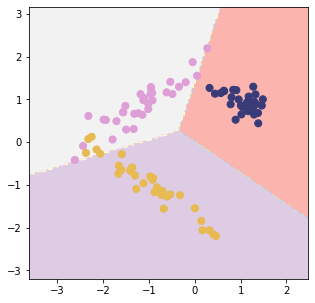

In [16]:
# Vaš kôd ovdje

y0_3 = [] # skup za y = 0
y1_3 = [] # skup za y = 1
y2_3 = [] # skup za y = 2

Y = [y0_3, y1_3, y2_3] # skup svih mogucih y

REG = [] # skup regresija

for i in range(len(y_2a)): # iteriranje svih elemenata y stvorenih s make_classification 
    for yi in range(3): # iteriranje 3 skupa yi
        
        if y_2a[i] == yi:  # ako y == yi postavi 1 ako ne postavi 0
            Y[yi].append(1)
        else:
            Y[yi].append(0)

plt.figure(figsize = (16, 4)) # postavljanje velicine slike

for i in range(3): 
    REG.append(LinearRegression().fit(X_2a, Y[i])) # racunanje regresija
    subplot(1, 3, i+1)
    plot_2d_clf_problem(X_2a, y_2a, lambda x: REG[i].predict(x) >= 0.5) # vizualizacija podataka za svaku regresiju
    plt.title("h{}".format(i))
    
    
def predict(X):
    H = [0, 0, 0]
    for i in range(3):
        H[i] = REG[i].predict(X) # izracun predikcija pomocu metode predict 
        
    y = []
    for i in range(len(H[0])):
            max = np.argmax([H[0][i], H[1][i], H[2][i]]) # h(x)=argmaxjhj(x)
            y.append(max)

    return np.array([y]) # vrati vrijednosti y


plt.figure(figsize = (5, 5))
plot_2d_clf_problem(X_2a, y_2a, predict) # vizualizacija podataka klasifikacije izracunate pomoci moje metode
plt.title("moj predict")


plt.figure(figsize = (5, 5))
reg_3 = RidgeClassifier(alpha = 0).fit(X_2a, y_2a)
plot_2d_clf_problem(X_2a, y_2a, lambda x : reg_3.predict(x)) # vizualizacija podataka klasifikacije



Ovaj zadatak bavi se probabilističkim diskriminativnim modelom, **logističkom regresijom**, koja je, unatoč nazivu, klasifikacijski model.

Logistička regresija tipičan je predstavnik tzv. **poopćenih linearnih modela** koji su oblika: $h(\mathbf{x})=f(\mathbf{w}^\intercal\tilde{\mathbf{x}})$. Logistička funkcija za funkciju $f$ koristi tzv. **logističku** (sigmoidalnu) funkciju $\sigma (x) = \frac{1}{1 + \textit{exp}(-x)}$.

### (a)  

Definirajte logističku (sigmoidalnu) funkciju $\mathrm{sigm}(x)=\frac{1}{1+\exp(-\alpha x)}$ i prikažite je za $\alpha\in\{1,2,4\}$.

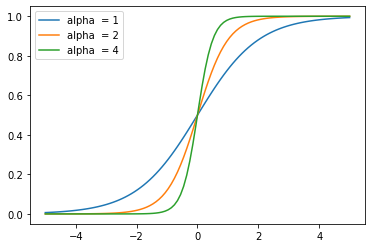

In [17]:
# Vaš kôd ovdje
sigm = lambda x, alpha=1: 1/(1 + exp(-alpha * x)) # definiranje funkcije sigm

X_3a = np.linspace(-5, 5, 100) # stvaranje skupa  podataka N=100 

sigm_1 = sigm(X_3a, 1) # izracun funkcije za alpha = 1
sigm_2 = sigm(X_3a, 2) # izracun funkcije za alpha = 2
sigm_4 = sigm(X_3a, 4) # izracun funkcije za alpha = 4

# vizualizacija razlicitih funkcija sigm
plt.plot(X_3a, sigm_1, label = "alpha  = 1")
plt.plot(X_3a, sigm_2, label = "alpha  = 2")
plt.plot(X_3a, sigm_4, label = "alpha  = 4")
plt.legend(loc="best")
plt.show()

**Q**: Zašto je sigmoidalna funkcija prikladan izbor za aktivacijsku funkciju poopćenoga linearnog modela? 
</br>

**Q**: Kakav utjecaj ima faktor $\alpha$ na oblik sigmoide? Što to znači za model logističke regresije (tj. kako izlaz modela ovisi o normi vektora težina $\mathbf{w}$)?

### (b) 

Implementirajte funkciju 

> `lr_train(X, y, eta=0.01, max_iter=2000, alpha=0, epsilon=0.0001, trace=False)` 

za treniranje modela logističke regresije gradijentnim spustom (*batch* izvedba). Funkcija uzima označeni skup primjera za učenje (matrica primjera `X` i vektor oznaka `y`) te vraća $(n+1)$-dimenzijski vektor težina tipa `ndarray`. Ako je `trace=True`, funkcija dodatno vraća listu (ili matricu) vektora težina $\mathbf{w}^0,\mathbf{w}^1,\dots,\mathbf{w}^k$ generiranih kroz sve iteracije optimizacije, od 0 do $k$. Optimizaciju treba provoditi dok se ne dosegne `max_iter` iteracija, ili kada razlika u pogrešci unakrsne entropije između dviju iteracija padne ispod vrijednosti `epsilon`. Parametar `alpha` predstavlja faktor L2-regularizacije.

Preporučamo definiranje pomoćne funkcije `lr_h(x,w)` koja daje predikciju za primjer `x` uz zadane težine `w`. Također, preporučamo i funkciju `cross_entropy_error(X,y,w)` koja izračunava pogrešku unakrsne entropije modela na označenom skupu `(X,y)` uz te iste težine.

**NB:** Obratite pozornost na to da je način kako su definirane oznake ($\{+1,-1\}$ ili $\{1,0\}$) kompatibilan s izračunom funkcije gubitka u optimizacijskome algoritmu.

In [19]:
from numpy import linalg

def lr_train(X, y, eta=0.01, max_iter=2000, alpha=0, epsilon=0.0001, trace=False):
    
    # Vaš kôd ovdje
    
    w = []
    for i in range(len(X[0]) + 1): # postavljanje nula u vektor w tezina
        w.append(0)

    
    
    W = [] # skup W svih vektora w tezina
    if trace:
        W.append(w.copy())
    
    error = cross_entropy_error(X, y, w) # postavljanje pocetne pogreske
    
    
    
    for i in range(max_iter):
        hx = lr_h(X, w) # izracun predikcija h
        hx_y = hx - y # (h-yi)
        
        # izracun novih deltaW: (deltaW0, deltaW) <- deltaW - (h-yi)*X
        deltaW0 = sum(hx_y)
        deltaW = np.matmul(hx_y, X) # (h-yi)* X
        
        for i in range(len(w)):
            if i == 0:
                w[i] = w[i] - eta * deltaW0 #w0 <- w0 + eta*deltaW0
            else:
                w[i] = w[i]*(1 - eta * alpha) - eta * deltaW[i-1] #w <- w*(1 - eta*alpha) + eta*deltaW
        
    
        if trace: 
            W.append(w.copy()) # umetanje vectora w u skup W
        
        new_error = cross_entropy_error(X, y, w) # izracun nove pogreske
        delta_error = abs(error - new_error) # izracun razlike nove i stare pogreske
       
        if delta_error < epsilon: # ako je razlika manja od epsilon prekini izracun
            break
            
        error = new_error # postavljanje nove pogreske
       
    
    # funkcija vraca vector w i skup W 
    if trace: 
        return w, W
    else:
        return w


        
def lr_h_with_poly(x, w):
    hx = np.matmul(x, w)
    return sigm(hx)


def lr_h(x, w): # funkcija koja vraca predikcije za primjer x uz zadane težine w
    wk = []
    for i in range(1, len(w)):
          wk.append(w[i])
    hx = np.matmul(x, wk) + w[0]
    return sigm(hx)


def cross_entropy_error_with_poly(X, y, w):
    EwD = 0
    for i in range(len(X)):
        h_xw = lr_h_with_poly(X[i], w)
        EwD += -y[i] * np.log(h_xw) - (1 - y[i]) * np.log(1 - h_xw)
        
    return EwD/len(X)


def cross_entropy_error(X, y, w): # funkcija koja izračunava pogrešku unakrsne entropije modela
    EwD = 0
    for i in range(len(X)):
        h_xw = lr_h(X[i], w)
        EwD += -y[i] * np.log(h_xw) - (1 - y[i]) * np.log(1 - h_xw)
        
    return EwD/len(X)

w = lr_train(seven_X, seven_y, max_iter=2000)
print(w)

[4.4544945420360165, -1.7108924201238562, 0.6841350736281357]


### (c)

Koristeći funkciju `lr_train`, trenirajte model logističke regresije na skupu `seven`, prikažite dobivenu granicu između klasa te  izračunajte pogrešku unakrsne entropije. 

**NB:** Pripazite da modelu date dovoljan broj iteracija.

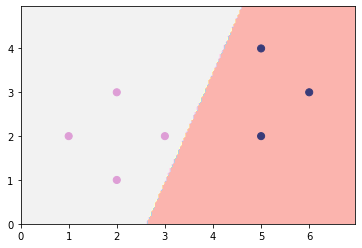

In [20]:
# Vaš kôd ovdje

plot_2d_clf_problem(seven_X, seven_y, lambda x: lr_h(x, w) >= 0.5) # vizualizacija podataka klasifikacije pomocu lr_train

**Q:** Koji kriterij zaustavljanja je aktiviran?

**Q:** Zašto dobivena pogreška unakrsne entropije nije jednaka nuli?

**Q:** Kako biste utvrdili da je optimizacijski postupak doista pronašao hipotezu koja minimizira pogrešku učenja? O čemu to ovisi?

**Q:** Na koji način biste preinačili kôd ako biste htjeli da se optimizacija izvodi stohastičkim gradijentnim spustom (*online learning*)?

### (d)

Prikažite na jednom grafikonu pogrešku unakrsne entropije (očekivanje logističkog gubitka) i pogrešku klasifikacije (očekivanje gubitka 0-1) na skupu `seven` kroz iteracije optimizacijskog postupka. Koristite trag težina funkcije `lr_train` iz zadatka (b) (opcija `trace=True`). Na drugom grafikonu prikažite pogrešku unakrsne entropije kao funkciju broja iteracija za različite stope učenja, $\eta\in\{0.005,0.01,0.05,0.1\}$.

In [21]:
from sklearn.metrics import zero_one_loss

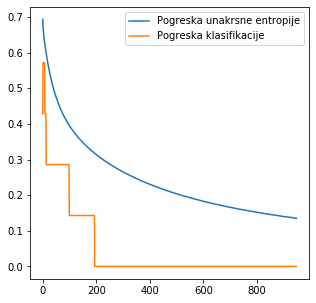

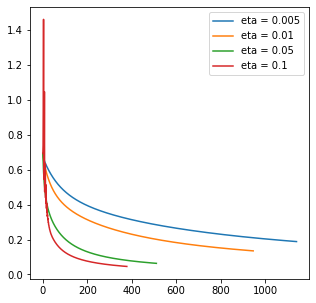

In [22]:
# Vaš kôd ovdje
w_3d, W_3d = lr_train(seven_X, seven_y, trace=True) # izracun tezina w i skupa W

cross_entropy_errors_3d_1 = [] # definiranje skupa pogreške unakrsne entropije modela
classification_errors_3d = [] # definiranje skupa pogreške klasifikacije

for i in range(len(W_3d)):
    EwD_3d = cross_entropy_error(seven_X, seven_y, W_3d[i]) # izracun pogreske za i-te tezine w u skupu W
    cross_entropy_errors_3d_1.append(EwD_3d) # dodavanje nove pogreske u skup pogreska entropije
    classification_error_3d = zero_one_loss(seven_y, lr_h(seven_X, W_3d[i]) >= 0.5) # izracun pogreske klasifikacije
    classification_errors_3d.append(classification_error_3d) # dodavanje nove pogreske u skup pogreska klasifikacije 

# vizualizacija krivulje pogreske unukrsne entropije i vizualizacija krivulje pogreske klasifikacije
plt.figure(figsize = (5, 5))
plt.plot(range(len(W_3d)), cross_entropy_errors_3d_1, range(len(W_3d)), classification_errors_3d)
plt.legend(['Pogreska unakrsne entropije', 'Pogreska klasifikacije'], loc="best")


ETAS = [0.005, 0.01, 0.05, 0.1] # definiranje raznih eta vrijednosti

classification_errors_3d_SETS = []  # definiranje skupa koji sadrzi skupove pogresaka entrojpije za svaki eta
for eta in ETAS: 
    w_3d, W_3d_2 = lr_train(seven_X, seven_y, eta=eta, trace=True) # izracun tezina w i skupa W za svaki eta
    classification_errors_3d_2 = [] # definiranje skupa pogreške unakrsne entropije modela za svaki eta
    for i in range(len(W_3d_2)):
        EwD_3d_2 =  cross_entropy_error(seven_X, seven_y, W_3d_2[i]) # izracun pogreske za i-te tezine w u skupu W
        classification_errors_3d_2.append(EwD_3d_2) # dodavanje nove pogreske u skup pogreska entropije
    classification_errors_3d_SETS.append(classification_errors_3d_2) # dodavanje skupa pogreska za odredeni eta


# vizualizacija krivulja pogreska unukrsne entropije za odreceni eta
plt.figure(figsize = (5, 5))

for i in range(len(ETAS)):
    plt.plot(range(len(classification_errors_3d_SETS[i])), classification_errors_3d_SETS[i], label="eta = {}".format(ETAS[i]))
plt.legend(loc="best")  
print()


**Q:** Zašto je pogreška unakrsne entropije veća od pogreške klasifikacije? Je li to uvijek slučaj kod logističke regresije i zašto?

**Q:** Koju stopu učenja $\eta$ biste odabrali i zašto?

### (e)

Upoznajte se s klasom [`linear_model.LogisticRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) koja implementira logističku regresiju. Usporedite rezultat modela na skupu `seven` s rezultatom koji dobivate pomoću vlastite implementacije algoritma.

**NB:** Kako ugrađena implementacija koristi naprednije verzije optimizacije funkcije, vrlo je vjerojatno da Vam se rješenja neće poklapati, ali generalne performanse modela bi trebale. Ponovno, pripazite na broj iteracija i snagu regularizacije.

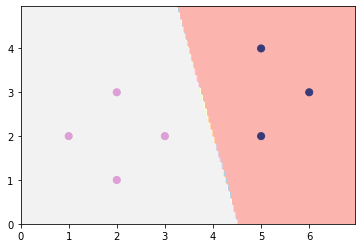

In [23]:
from sklearn.linear_model import LogisticRegression

# Vaš kôd ovdje
clf_3e = LogisticRegression(max_iter=5000, C=1).fit(seven_X, seven_y)  # treniranje modela s LogisticRegression
plot_2d_clf_problem(seven_X, seven_y, lambda x : clf_3e.predict(x)) # vizualizacija podataka

### 4. Analiza logističke regresije

### (a)

Koristeći ugrađenu implementaciju logističke regresije, provjerite kako se logistička regresija nosi s vrijednostima koje odskaču. Iskoristite skup `outlier` iz prvog zadatka. Prikažite granicu između klasa.

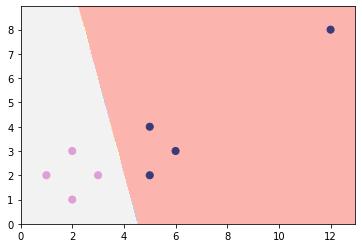

In [24]:
# Vaš kôd ovdje
clf_4a = LogisticRegression(max_iter=5000, C=1).fit(outlier_X, outlier_y) # treniranje modela s LogisticRegression
plot_2d_clf_problem(outlier_X, outlier_y, lambda x : clf_4a.predict(x)) # vizualizacija podataka

**Q:** Zašto se rezultat razlikuje od onog koji je dobio model klasifikacije linearnom regresijom iz prvog zadatka?

### (b)

Trenirajte model logističke regresije na skupu `seven` te na dva odvojena grafikona prikažite, kroz iteracije optimizacijskoga algoritma, (1) izlaz modela $h(\mathbf{x})$ za svih sedam primjera te (2) vrijednosti težina $w_0$, $w_1$, $w_2$.

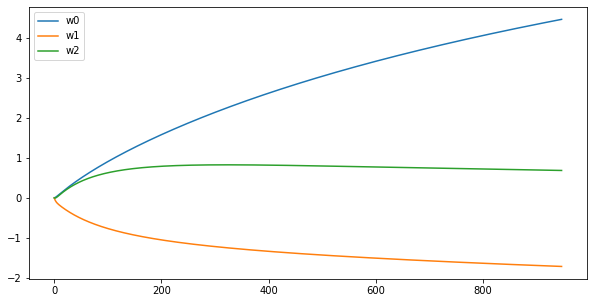

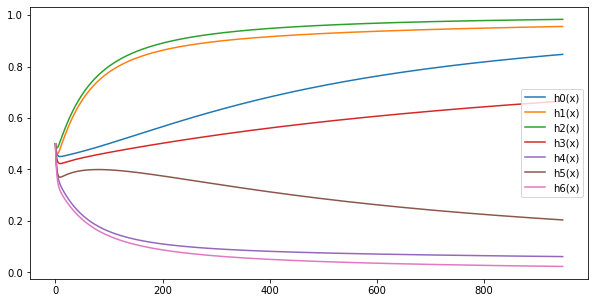

In [25]:
# Vaš kôd ovdje

w_4b, W_4b = lr_train(seven_X, seven_y, trace=True) # izracun tezina w i skupa W

w0_4b = [] # definiranje skupa koji sadrzava w0 tezine
w1_4b = [] # definiranje skupa koji sadrzava w1 tezine
w2_4b = [] # definiranje skupa koji sadrzava w2 tezine

h0_4b = [] # definiranje skupa koji sadrzava izlaze modela h0
h1_4b = [] # definiranje skupa koji sadrzava izlaze modela h1
h2_4b = [] # definiranje skupa koji sadrzava izlaze modela h2
h3_4b = [] # definiranje skupa koji sadrzava izlaze modela h3
h4_4b = [] # definiranje skupa koji sadrzava izlaze modela h4
h5_4b = [] # definiranje skupa koji sadrzava izlaze modela h5
h6_4b = [] # definiranje skupa koji sadrzava izlaze modela h6

Wi_4b = [w0_4b, w1_4b, w2_4b] # skup skupova tezina
H_4b = [h0_4b, h1_4b, h2_4b, h3_4b, h4_4b, h5_4b, h6_4b] # skup skupova izlaza modela 


for i in range(len(W_4b)): # za svaku tezinu w iz skupa W
    for j in range(len(H_4b)):
        hx = lr_h(seven_X[j], W_4b[i]) # izracun izlaza modela Hi 
        H_4b[j].append(hx) # dodavanje modela u odreceni skup modela
    for k in range(len(Wi_4b)): 
        Wi_4b[k].append(W_4b[i][k]) # dodavanje tezine wi u odreceni skup


# vizualizacija promijene tezina w
plt.figure(figsize = (10, 5))
for i in range(len(Wi_4b)):
    plt.plot(range(len(W_4b)), Wi_4b[i] , label="w{}".format(i))
plt.legend(loc="best")


# vizualizacija promjene izlaze modela h
plt.figure(figsize = (10, 5))
for i in range(len(H_4b)):
    plt.plot(range(len(W_4b)), H_4b[i] , label="h{}(x)".format(i))
plt.legend(loc="best")
print()

### (c)

Ponovite eksperiment iz podzadatka (b) koristeći linearno neodvojiv skup podataka `unsep` iz prvog zadatka.

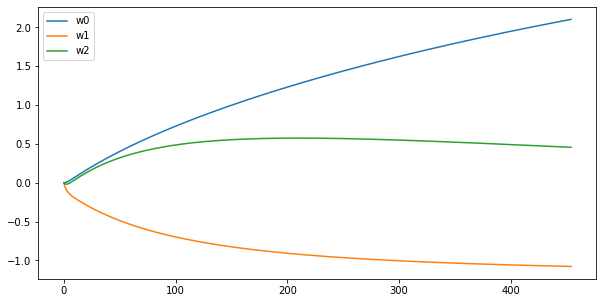

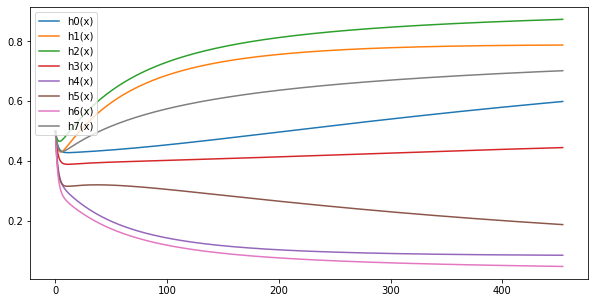

In [26]:
# Vaš kôd ovdje
w_4c, W_4c = lr_train(unsep_X, unsep_y, trace=True) # izracun tezina w i skupa W

w0_4c = [] # definiranje skupa koji sadrzava w0 tezine
w1_4c = [] # definiranje skupa koji sadrzava w1 tezine
w2_4c = [] # definiranje skupa koji sadrzava w2 tezine

h0_4c = [] # definiranje skupa koji sadrzava izlaze modela h0
h1_4c = [] # definiranje skupa koji sadrzava izlaze modela h1
h2_4c = [] # definiranje skupa koji sadrzava izlaze modela h2
h3_4c = [] # definiranje skupa koji sadrzava izlaze modela h3
h4_4c = [] # definiranje skupa koji sadrzava izlaze modela h4
h5_4c = [] # definiranje skupa koji sadrzava izlaze modela h5
h6_4c = [] # definiranje skupa koji sadrzava izlaze modela h6
h7_4c = [] # definiranje skupa koji sadrzava izlaze modela h7


Wi_4c = [w0_4c, w1_4c, w2_4c] # skup skupova tezina
H_4c = [h0_4c, h1_4c, h2_4c, h3_4c, h4_4c, h5_4c, h6_4c, h7_4c]  # skup skupova izlaza modela


for i in range(len(W_4c)): # za svaku tezinu w iz skupa W
    for j in range(len(H_4c)):
        hx = lr_h(unsep_X[j], W_4c[i]) # izracun izlaza modela Hi
        H_4c[j].append(hx) # dodavanje modela u odreceni skup modela
    for k in range(len(Wi_4c)):
        Wi_4c[k].append(W_4c[i][k]) # dodavanje tezine wi u odreceni skup

# vizualizacija promijene tezina w
plt.figure(figsize = (10, 5))
for i in range(len(Wi_4c)):
    plt.plot(range(len(W_4c)), Wi_4c[i] , label="w{}".format(i))
plt.legend(loc="best")


# vizualizacija promjene izlaze modela h
plt.figure(figsize = (10, 5))
for i in range(len(H_4c)):
    plt.plot(range(len(W_4c)), H_4c[i] , label="h{}(x)".format(i))
plt.legend(loc="best")
print()

**Q:** Usporedite grafikone za slučaj linearno odvojivih i linearno neodvojivih primjera te komentirajte razliku.

### 5. Regularizirana logistička regresija

Trenirajte model logističke regresije na skupu `seven` s različitim faktorima L2-regularizacije, $\alpha\in\{0,1,10,100\}$. Prikažite na dva odvojena grafikona (1) pogrešku unakrsne entropije te (2) L2-normu vektora $\mathbf{w}$ kroz iteracije optimizacijskog algoritma.

In [27]:
from numpy.linalg import norm

Alpha = 0, iteracije u lr_train : 948
Alpha = 1, iteracije u lr_train : 805
Alpha = 10, iteracije u lr_train : 406
Alpha = 100, iteracije u lr_train : 5



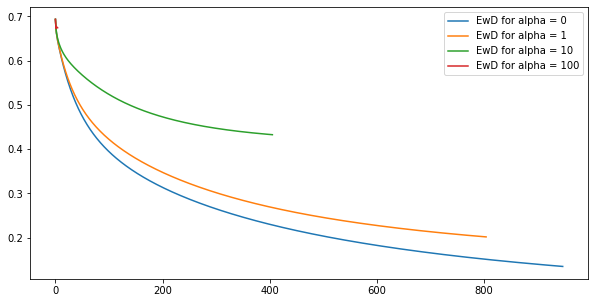

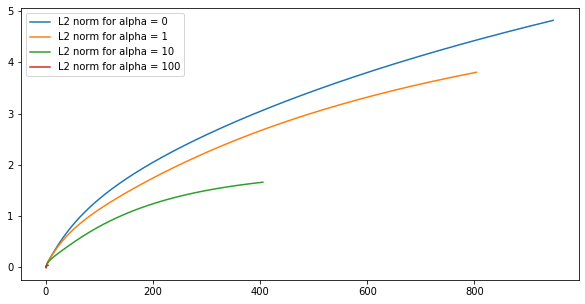

In [28]:
# Vaš kôd ovdje
ALPHAS = [0, 1, 10, 100] # definiranje raznih alpha vrijednosti
cross_entropy_errors_5_SETS = [] # definiranje skupa koji sadrzi skupove unakrsnih pogresaka za svaki alhpa
norms_5_SETS = [] # definiranje skupa koji sadrzi skupove norma za svaki alhpa
lenofW_5 = []

for i in range(len(ALPHAS)):
    w_5, W_5 = lr_train(seven_X, seven_y, alpha=ALPHAS[i], trace=True, epsilon = 0.0001) # izracun tezina w i skupa W
    cross_entropy_errors_5 = [] # definiranje skupa unakrsnih pogresaka 
    norms_5 = [] # definiranje skupa norma
    lenofW_5.append(len(W_5)) # dodavanje broja iteracija za izracun tezine w
    
    for j in range(len(W_5)): 
        EwD = cross_entropy_error(seven_X, seven_y, W_5[j]) # izracun pogreske za i-te tezine w u skupu W
        cross_entropy_errors_5.append(EwD) # dodavanje nove pogreske u skup pogreska entropije
        norma = norm(W_5[j]) # izracun L2 norme za svaku tezinu w 
        norms_5.append(norma) # dodavanje nove norme u skup normi
   
    cross_entropy_errors_5_SETS.append(cross_entropy_errors_5)  # dodavanje skupa pogreska za odredeni alhpa
    norms_5_SETS.append(norms_5)  # dodavanje skupa normi za odredeni eta

# ispis potrenbnih iteracija za svaki alhpa
for i in range(len(ALPHAS)):
    print("Alpha = {}, iteracije u lr_train : {}".format(ALPHAS[i], lenofW_5[i]))


# vizualizacija krivulja pogreska unukrsne entropije za odreceni alhpa
plt.figure(figsize = (10, 5))
for i in range(len(cross_entropy_errors_5_SETS)):
    plt.plot(range(lenofW_5[i]), cross_entropy_errors_5_SETS[i] , label="EwD for alpha = {}".format(ALPHAS[i]))
plt.legend(loc="best")


# vizualizacija krivulja norme za odreceni alpha
plt.figure(figsize = (10, 5))
for i in range(len(norms_5_SETS)):
    plt.plot(range(lenofW_5[i]), norms_5_SETS[i] , label="L2 norm for alpha = {}".format(ALPHAS[i]))
plt.legend(loc="best")

print()


**Q:** Jesu li izgledi krivulja očekivani i zašto?

**Q:** Koju biste vrijednost za $\alpha$ odabrali i zašto?

### 6. Logistička regresija s funkcijom preslikavanja

Proučite funkciju [`datasets.make_classification`](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html). Generirajte i prikažite dvoklasan skup podataka s ukupno $N=100$ dvodimenzijskih ($n=2)$ primjera, i to sa dvije grupe po klasi (`n_clusters_per_class=2`). Malo je izgledno da će tako generiran skup biti linearno odvojiv, međutim to nije problem jer primjere možemo preslikati u višedimenzijski prostor značajki pomoću klase [`preprocessing.PolynomialFeatures`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html), kao što smo to učinili kod linearne regresije u prvoj laboratorijskoj vježbi. Trenirajte model logističke regresije koristeći za preslikavanje u prostor značajki polinomijalnu funkciju stupnja $d=2$ i stupnja $d=3$. Prikažite dobivene granice između klasa. Možete koristiti svoju implementaciju, ali se radi brzine preporuča koristiti `linear_model.LogisticRegression`. Regularizacijski faktor odaberite po želji.

**NB:** Kao i ranije, za prikaz granice između klasa koristite funkciju `plot_2d_clf_problem`. Funkciji kao argumente predajte izvorni skup podataka, a preslikavanje u prostor značajki napravite unutar poziva funkcije `h` koja čini predikciju, na sljedeći način:

In [29]:
from sklearn.preprocessing import PolynomialFeatures

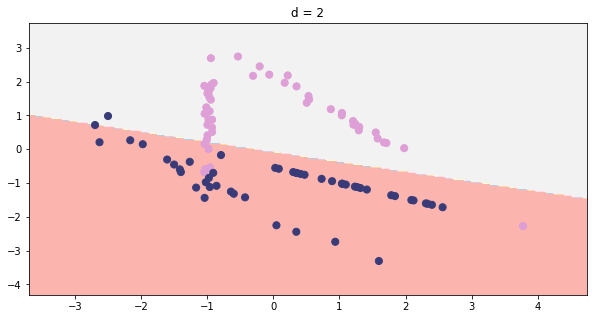

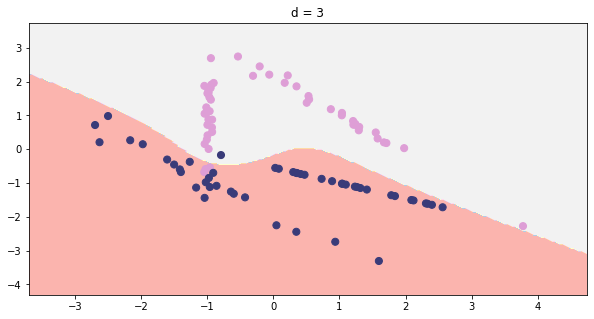

In [30]:
from sklearn.datasets import make_classification

# Vaš kôd ovdje
# generiranje slucajnog dvodimenzijskog skupa podataka od dve klase sa dvije grupe po klasi
X_6, y_6 = make_classification( n_features=2, n_informative=2, n_redundant=0, 
                                 n_repeated=0, n_classes=2, n_clusters_per_class=2)

Ds = [2, 3] # definiranje raznih d vrijednosti

for i in range(len(Ds)):
    poly_6 = PolynomialFeatures(Ds[i]) 
    PHI_6 = poly_6.fit_transform(X_6) # preslikavanje u prostor vise dimenzije za svaki d
    clf_6 = LogisticRegression(C=1).fit(PHI_6, y_6) # treniranje modela s LogisticRegression
    
    # vizualizacija podataka za svaki d
    figure(figsize = (10, 5))
    plot_2d_clf_problem(X_6, y_6, lambda x : clf_6.predict(poly_6.transform(x)))
    plt.title("d = {}".format(Ds[i]))

**Q:** Koji biste stupanj polinoma upotrijebili i zašto? Je li taj odabir povezan s odabirom regularizacijskog faktora $\alpha$? Zašto?